# <center>Pattern recognition 1st project</center>

![alt text](https://i.postimg.cc/NfzxXZBn/pr.png)


### Importing the necessary modules

In [11]:
!pip install scipy
!pip install math
!pip install numpy
!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import math
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D,axes3d
import statistics
from mpl_toolkits.mplot3d.axes3d import get_test_data

ERROR: Could not find a version that satisfies the requirement math (from versions: none)
ERROR: No matching distribution found for math


### Initialization of the variables

In [12]:
# Τhe means of classes: M1 for class ω1 (healthy) and M2 for class ω2 (possible presence of cancer)
M1 = np.array([0.4, 0.8]) 
M2 = np.array([1.5, 2.7])

# Τhe common covariance matrix of the distributions, which shows us how spread the distributions are on each axis
CovMat = np.array([[1.5, 0], [0, 0.8]])

# Α-priori probability for class w1 (P(w1)) and w2 (P(w2)) accordingly
Pw1 = 0.95
Pw2 = 0.05

### Introduction

On the occasion of the biomedical data given to us by the __Microbiological Department of the Center__, we developed __diagnostic models,__ which will have a __supportive role__ in the specialized decisions __of the Center's __doctors__.
Our data consists of __two microbiological markers__ extracted during sample testing
blood and are known to be associated with a specific form of cancer.
After many years of data analysis we have found that our data follows Gaussian probability density functions p(__x__|$ω_1$) and
p(__x__|$ω_2$), where __x__ is the vector of the two indices. So we decided to develop a Bayesian decision system.

The __mean values__ for the __$ω_1$__ (healthy) and __$ω_2$__ (probable cancer) classes are:
* __$µ_1$__ = (0.4, 0.8)
* __$µ_2$__ = (1.5, 2.7)

respectively. Also the distributions initially have a common covariance matrix
Σ =$ {\begin{pmatrix}1.5 & 0\\0 & 0.8\end{pmatrix}}$. Then we have $Σ_1$ = $Σ$ and $Σ_2$ = $\frac{Σ}{4}$.
_We notice that Σ[1][2] and Σ[2][1] are null which __probably__ means that the pointers are not related in some way_.


Finally, the a-priori probabilities of the classes are:
* __P($ω_1$)__ = 0.95
* __P($ω_2$)__ = 0.05

respectively.

**As we know, the values ​​of the microbiological indicators extracted during the examination of a blood sample,
they cannot have negative values, so in the distribution diagrams we will see below,
we will only deal with the intervals where x and y are positive, however negative values ​​have been added for completeness and presentation.**

__All 3D diagrams below have been created in a way that allows the reader to rotate them. It was considered quite useful for a better understanding of the graphs.__

__In the presentations of Part A and Part B, there are several elements in common, BUT each presentation is different.__

## Part A
### Task 1
#### Task 1 Code:

<IPython.core.display.Javascript object>


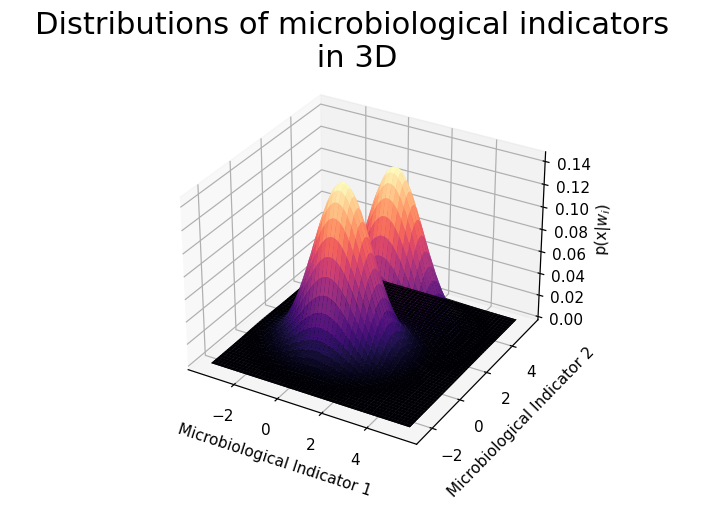

<IPython.core.display.Javascript object>


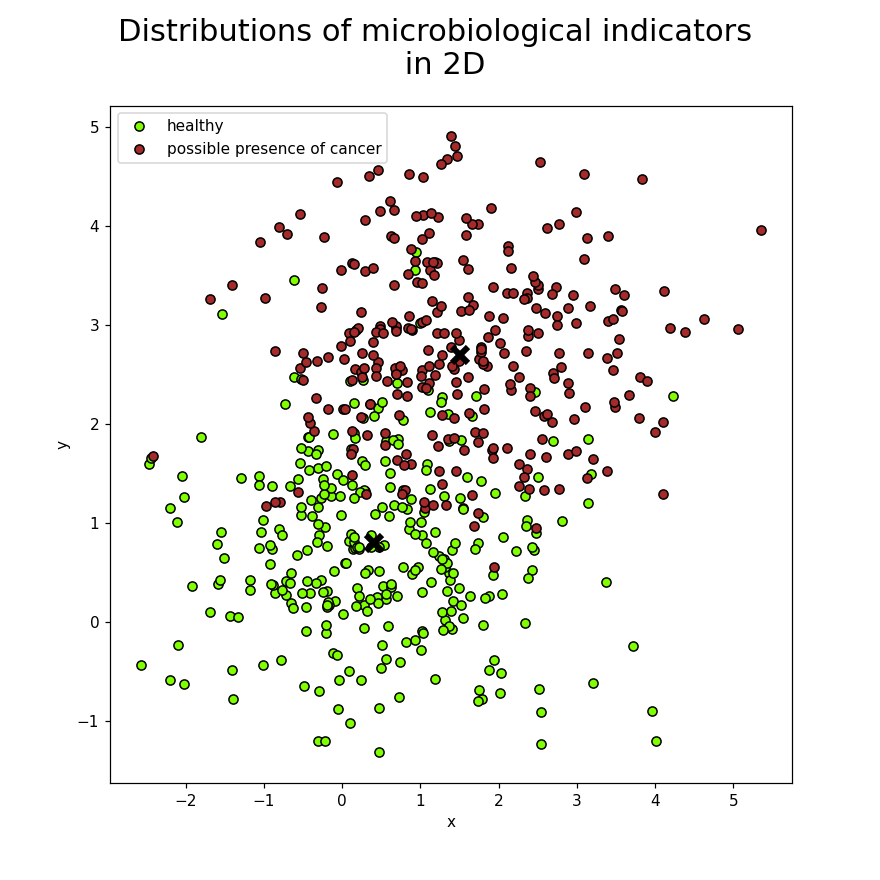

In [13]:
#Make a 3D plot
# Take 100 samples, with values from -3.5 to 5.5 and a step of 0.09, for the first microbiological indicator
x = np.linspace(-3.5,5.5,100) 
# Take 100 samples, with values from -2.5 to 5.5 and step 0.08, for the other microbiological indicator
y = np.linspace(-2.5,5.5,100) 

# Returns 2-D grid coordinates based on the coordinates contained in vectors x and y.
X, Y = np.meshgrid(x,y)

# Initiazes an 3D array with X,Y in the third dimension 
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

# We calculate Gaussian probability density functions p(x|ω1) and p(x|ω2), based on the definition,
# with rv1--> p(x|ω1), rv2--> p(x|ω2)
rv1 = multivariate_normal(M1, CovMat) 
rv2 = multivariate_normal(M2, CovMat)

# Plot the 3D figure
fig = plt.figure()
fig.suptitle('Distributions of microbiological indicators\n in 3D', fontsize=20)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, rv1.pdf(pos),cmap='magma',linewidth=0)
ax.plot_surface(X, Y, rv2.pdf(pos),cmap='magma',linewidth=0)
ax.set_xlabel('Μicrobiological Ιndicator 1')
ax.set_ylabel('Μicrobiological Ιndicator 2')
ax.set_zlabel('p(x|$w_i$)')
plt.show()

# ------------------------------------------------------------------------#

#Make a 2D plot
# 300 random samples are taken from a normal multivariate distribution
# with mean-->M1,M2 and cov-->CovMat
samples1 = np.random.multivariate_normal(M1, CovMat, size=300)
samples2 = np.random.multivariate_normal(M2, CovMat, size=300)
#A second figure is created
fig2 = plt.figure(figsize=(8,8))
fig2.suptitle('Distributions of microbiological indicators \n in 2D', fontsize=20)
#Plotting the samples in one graph
plt.plot(samples1[:,0], samples1[:,1],'o',c = 'chartreuse',markeredgecolor = 'black')
plt.plot(samples2[:,0], samples2[:,1],'o',c= 'brown',markeredgecolor = 'black')
plt.xlabel('x');
plt.ylabel('y');
plt.plot(0.4,0.8,'x',c= 'black',markeredgecolor = 'black',markeredgewidth = 4,markersize=10)
plt.plot(1.5,2.7,'x',c= 'black',markeredgecolor = 'black',markeredgewidth = 4,markersize=10)
plt.legend(['healthy','possible presence of cancer']);

#### Presentation of Task 1:

##### In the diagrams above we see the distributions of the probability functions of the classes:
* ω1 (healthy)
* ω2 (probable existence of cancer)

__relative to x.__

##### Two diagrams were created:
* __"Distributions of microbiological indicators in 3D"__ which has:
     * on the __x,y__ axes, the __two microbiological indicators__
     * on the axis of __z__, the probability that a person is open to one of the 2 classes we said above.
    
     They are created with the help of the __multivariate_normal__ function, 2 "bells" and follow a multivariate normal distribution with means and covariance matrix mentioned above.



* __"Distributions of microbiological indicators in 2D"__:
     * in which __300__ samples were randomly selected from a multivariate normal distribution using the __np.random.multivariate_normal__ function.
     * has on its axes, the two microbiological indicators
     * The colors we see in the diagram are from incidents with microbiological indicators whose values correspond to:
         * with __green__ in healthy ones
         * with __red__ in people with possible cancer
         * with __black__ the centers of the two distributions
  


##### Conclusions derived from the above diagrams:
From the __3D diagram__ we observe that:
* the two distributions are centered at their mean values respectively
* __not__ are __uniformly distributed on the x,y__ axes, since even though the covariance matrix has __zeros on its non-main diagonal__ (we cannot draw any conclusion about the first index if we know the second and vice versa), __on the main diagonal__ the one element is almost __twice__ the other, which means that the __spread__ of the distribution around the __first indicator is almost twice the spread around the second indicator.__ The terminology of the above interpretation is __"diagonal multivariate Gaussian distribution"__


From the __2D diagram__ we observe that:
* considering an imaginary circle around the center of each distribution, we find that this graph is essentially the __top view__ of the above 3D graph.
* all samples are __randomly spaced__ around their __mean__ (represented by x on the graph), which __depends__ on the __covariance matrix__, i.e. the __spread__ it tells us they will have around each indicator, as mentioned above

__Regarding values of microbiological indicators:__

* __Negative values, as we said above, do not have any physical meaning, they are simply for presentation purposes.__

* __healthy__ individuals have a higher probability of having both values of the indicators, around the values taken by the __healthy__ distribution, i.e. towards the bottom left of the figure (positive), __with values close to (0.4, 0.8).__

* the __people who probably have cancer__, have a higher probability of having both values of the indices, around the values taken by the distribution __probable possible presence of cancer__, i.e. towards the upper right of the figure, __with values close to (1.5, 2.7 ).__

__It is relatively easy for a doctor to notice if a patient of his has the possibility of having cancer, since the values of the microbiological indicators, in case the patient is likely to have cancer, are for the first indicator about four times and for the second 3.5 times higher, compared to the values that the indicators would have, if the patient was healthy.__

### Task 2
#### Task 2 Code:

<IPython.core.display.Javascript object>


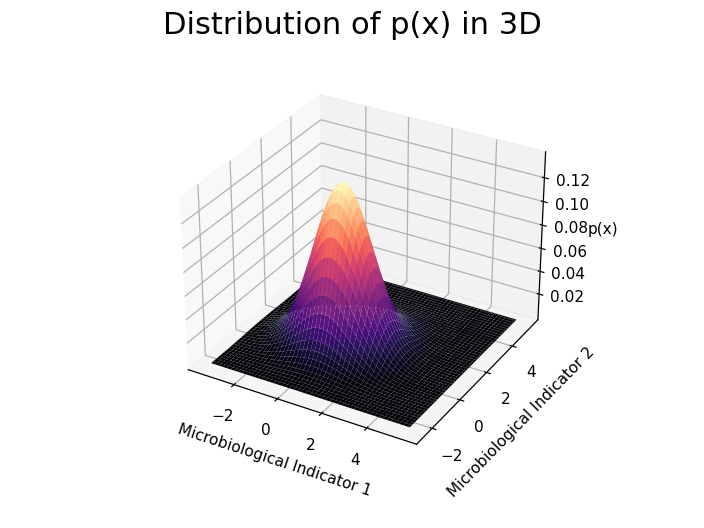

<IPython.core.display.Javascript object>


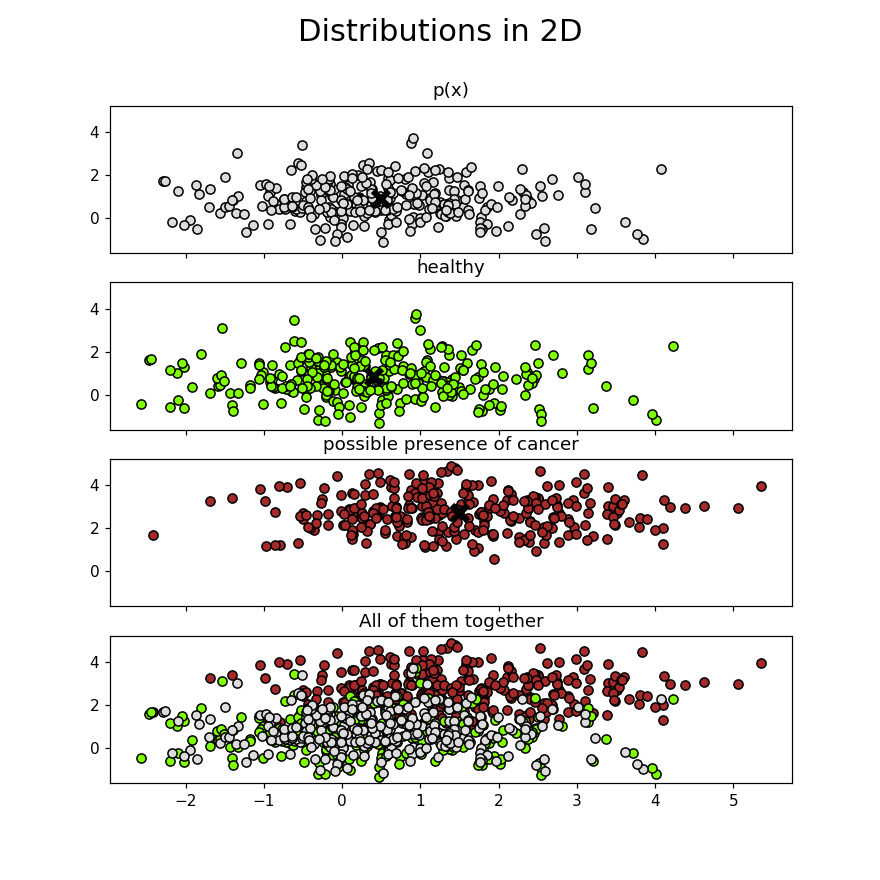

In [14]:
# The probability of (x,y) existsing,  PosX calculates the total probability distribution
# Calculated by the total probability theorem as sum((p(x|w_i)*P(w_i))), where i is the total number of the classes.
# In our code p(x|w_i) is represented by rvi.pdf(pos), P(w_i) by Pwi
PosX=(rv1.pdf(pos)*Pw1)+(rv2.pdf(pos)*Pw2)

# Plot the 3D figure
fig = plt.figure()
fig.suptitle('Distribution of p(x) in 3D', fontsize=20)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, PosX,cmap='magma',linewidth=0)
ax.set_xlabel('Μicrobiological Ιndicator 1')
ax.set_ylabel('Μicrobiological Ιndicator 2')
ax.set_zlabel('p(x)')
plt.show()

# ------------------------------------------------------------------------#

#Make a 2D 4x1 subplot
# The probability of (x,y) existsing,  PosX2 calculates the total probability distribution
# with the operation: (samples1*Pw1)+(samples2*Pw2), where samples1, samples2, 
# are the 300 random samples from the classes ω1 and ω2 respectively, that we presented in the previous query.
# Pw1 and Pw2, are the a priori probabilities, given by the utterance.
# This operation is derived from the total probability theorem as sum((p(x|w_i)*P(w_i))),
# where i is the total number of the classes. In our code p(x|w_i) is represented by samplesi, P(w_i) by Pwi.
PosX2 = (samples1*Pw1)+(samples2*Pw2) 

# Plotting p(x) 
fig3, axs = plt.subplots(4, sharex=True, sharey=True,figsize=(8,8))
fig3.suptitle('Distributions in 2D', fontsize=20)
axs[0].plot(PosX2[:,0], PosX2[:,1],'o',c = 'gainsboro',markeredgecolor = 'black')
axs[0].plot(statistics.mean(PosX2[:,0]),statistics.mean(PosX2[:,1]),'x',c= 'black',markeredgecolor = 'black',markeredgewidth = 4,markersize=10)
axs[0].set_title('p(x)');

axs[1].plot(samples1[:,0], samples1[:,1],'o',c = 'chartreuse',markeredgecolor = 'black')
axs[1].set_title('healthy');
axs[1].plot(0.4,0.8,'x',c= 'black',markeredgecolor = 'black',markeredgewidth = 4,markersize=10)

axs[2].plot(samples2[:,0], samples2[:,1],'o',c= 'brown',markeredgecolor = 'black')
axs[2].set_title('possible presence of cancer');
axs[2].plot(1.5,2.7,'x',c= 'black',markeredgecolor = 'black',markeredgewidth = 4,markersize=10)

axs[3].plot(samples2[:,0], samples2[:,1],'o',c= 'brown',markeredgecolor = 'black')
axs[3].plot(samples1[:,0], samples1[:,1],'o',c = 'chartreuse',markeredgecolor = 'black')
axs[3].plot(PosX2[:,0], PosX2[:,1],'o',c = 'gainsboro',markeredgecolor = 'black')
axs[3].set_title('All of them together');

#### Presentation of Task 2:

###### In the diagrams above, the total probability distribution is studied:
The total probability is given by the formula $p(x) = \sum_{i=1}^2 p(x|ω_i) P(ω_i)$. We have the values of the distributions __$p(x|ω_i)$__ from the __first question__ and the __a priori probability__ $P(ω_i)$ from the __utterance.__

__In the "Distribution of p(x) in 3D" diagram there are 3 axes:__
* the __x,y__, which have the __two microbiological indicators__
* the __z__, which presents the total probability distribution p(x).

__In every 2D diagram there are two axes corresponding to:__
* the __x,__ in the values of the first microbiological index
* the __y,__ in the values of the second microbiological index

from samples we took.

  __In the 2D diagrams four cases are considered:__
* In the 1st diagram in __grey__ color, the distribution of the total probability p(x)

* In the 2nd diagram in __green__ color, the probability distribution of the samples whose microbiological indicators correspond to the healthy ones.

* In the 3rd chart in __red__ color, the probability distribution of samples whose microbiological markers correspond to the possible presence of cancer.

* In the 4th diagram all the previous diagrams are presented together so that we can observe them better

__The centers of each distribution are marked in black.__





##### Conclusions derived from the above diagrams:

We examined the results given by both microbiological markers, i.e. the case of a person being __healthy__ or __having a possible presence of cancer__, based on both blood markers at the same time.
 
__Regarding the values of microbiological indicators:__
* We notice that p(x) is __quite similar__ to the class __"healthy" slightly shifted towards the class "likely to have cancer"__ , this is because as we see __from the formula__ the samples of each class are multiplied by a weight, a priori probability of each class and since __P($ω_1$) is 0.95__ and __P($ω_2$) 0.05__, the distribution __is quite similar__ more to the distribution of the __"healthy" class,__ i.e. it has __smaller values and in the 2 microbiological indicators.__

__Total probability is basically the overall results, ie 5% of people get cancer and 95% are healthy. Therefore, as we can see from the graph, we expect the general results to be quite similar to the distribution that healthy people have (because they are the larger percentage of people), i.e. the indices to be close to the values (0.4,0.8) and a small portion of people will have index values , which will be closer to (1.5,2.7).__

### Task 3
#### Task 3 Code:

<IPython.core.display.Javascript object>


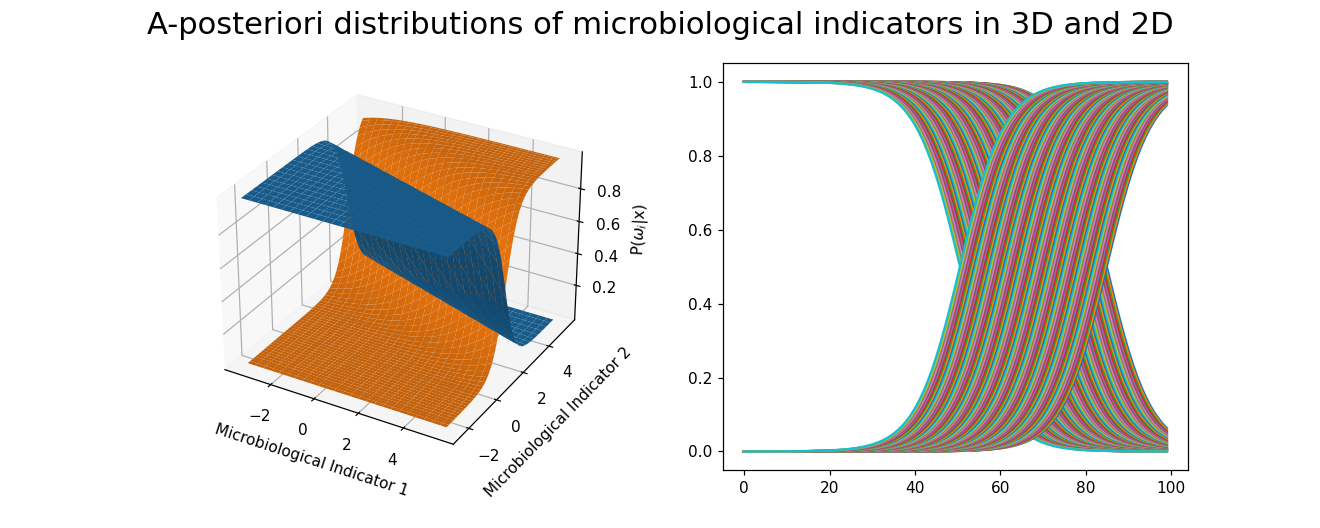

<IPython.core.display.Javascript object>


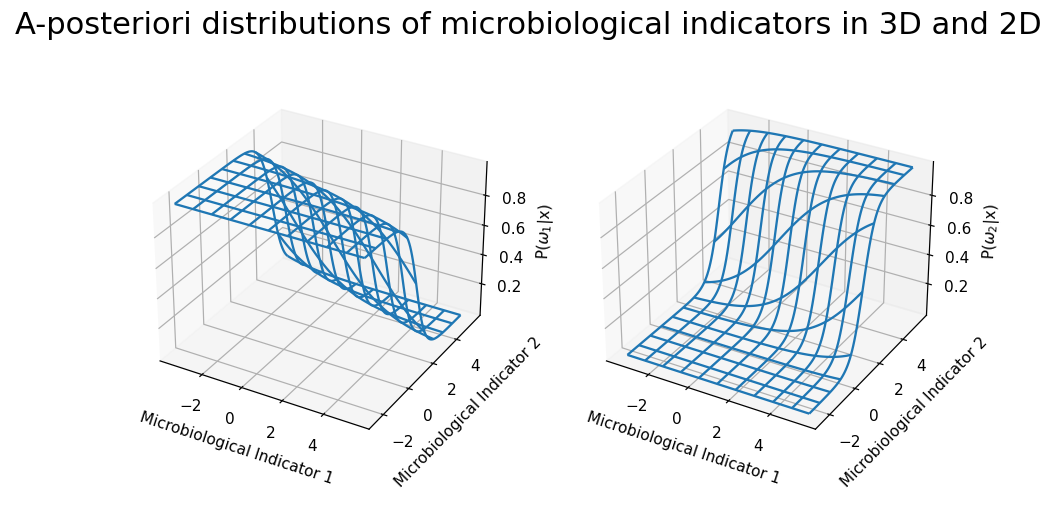

In [15]:
# A-posteriori probabilities P(ω1|x) and P(ω2|x) respectively. Calculated by the bayes theorem as (p(x|w_i)*P(w_i))/p(x). In our code
# p(x|w_i) is represented by rvi.pdf(pos), P(w_i) by Pwi and p(x) by PosX
Pw1CondX =(rv1.pdf(pos)*Pw1)/PosX 
Pw2CondX =(rv2.pdf(pos)*Pw2)/PosX 

# First Figure
#Make a 3D plot
fig = plt.figure(figsize=plt.figaspect(0.4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(X, Y, Pw1CondX, rstride=4, cstride=4, linewidth=0)
p = ax.plot_surface(X, Y, Pw2CondX, rstride=2, cstride=4, linewidth=0)
ax.set_xlabel('Μicrobiological Ιndicator 1')
ax.set_ylabel('Μicrobiological Ιndicator 2')
ax.set_zlabel('P($ω_i$|x)')

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2)
fig.suptitle('A-posteriori distributions of microbiological indicators in 3D and 2D', fontsize=20)
p = plt.plot(Pw1CondX)
p = plt.plot(Pw2CondX)

# ------------------------------------------------------------------------#

# Second Figure
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.suptitle('A-posteriori distributions of microbiological indicators in 3D and 2D', fontsize=20)
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface
ax.plot_wireframe(X, Y, Pw1CondX, rstride=10, cstride=10)
ax.set_xlabel('Μicrobiological Ιndicator 1')
ax.set_ylabel('Μicrobiological Ιndicator 2')
ax.set_zlabel('P($ω_1$|x)')
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe
ax.plot_wireframe(X, Y, Pw2CondX, rstride=10, cstride=10)
ax.set_xlabel('Μicrobiological Ιndicator 1')
ax.set_ylabel('Μicrobiological Ιndicator 2')
ax.set_zlabel('P($ω_2$|x)')
plt.show()

#### Presentation of Task 3:

##### At this point we will deal with the a-posteriori or posterior probabilities P ($ω_1$|x) and P ($ω_2$|x)
These are the probabilities that the state is $ω_1$ or $ω_2$ respectively, __given__ that the estimator __x__ has been counted, i.e. both indices have been counted.
Therefore, the requirement is given by the relation: $P(ω_i|x) = \frac{p(x|ω_i) P(ω_i)}{p(x)}$. We have the values of the distributions __$p(x|ω_i)$__ from the __first question,__ the __a priori probabilities__ $P(ω_i)$, from the __utterance__ and the __total probability__ p(x) from the __second question.__
Also the probability density functions must sum to unity.

##### To study the possibilities we made 4 diagrams:
* The __first__ diagram, __third__ and __fourth__ are three-dimensional:
     * on the __x,y__ axes, correspond to the __two microbiological indicators__
     * on the __z__ axis, the __a posteriori__ probabilities

* _The __second__ chart is two dimensional:_
     * on the __x__ axis, the __two microbiological indicators__ correspond
     * on the __y__ axis, the __a posteriori__ probabilities



##### Conclusions derived from the above diagrams:
We studied the probability that an individual belongs to the __"healthy"__ class or to the __"probable cancer"__ class, given that both microbiological markers have been measured.

__In the diagrams we observe__, the probability that the person __who did the tests__ belongs to the group of __healthy people__ or to those __who have a possible presence of cancer__, depending on what __value__ each __microbiological index has taken.__

__In other words, we observe that:__

* __for the class of healthy individuals:__
     * for __large values__ in the __second indicator__ (greater than 4.5) and medium values for the first indicator (greater than 2), the __probability__ of the condition being __"healthy" is close to and lower than 10%__
     * for __smaller values__ in the __second index__ (less than 4.5) the __probability__ of the condition being __"healthy" is from 10% for large values of the 1st index and rises to 100% for smaller ones__
     * for __very small values__ in the __second index__ (less than 1.5) the __probability__ of the condition being __"healthy" is close to 100% regardless of the values of the 1st index
    
* __for the class of people with possible cancer:__
     * for __very small values__ in the __second index__ (less than 2) and __medium values__ for the first index (greater than 2), the __probability__ of the condition being __"probable cancer" is close to and lower than 10%__
     * for __small values__ in the __second index__ (less than 4.5) the __probability__ of the condition being __"probable existence of cancer" is from 10% for small values of the 1st index and rises to 100% for larger ones__
     * for __large values__ in the __second index__ (greater than 4.5) the __probability__ of the condition being __"probable cancer" is close to 100% regardless of the values of the 1st index

__In both cases correspondingly, the first microbiological indicator affects the probability much less than the second. For high values of both indicators we are with a high probability in the "possible existence of cancer" state, while for low values in the "healthy" state__

### Task 4  
#### Task 4 code:

The probability of error is: 0.03462667121930229 which is ~3.463%


<IPython.core.display.Javascript object>


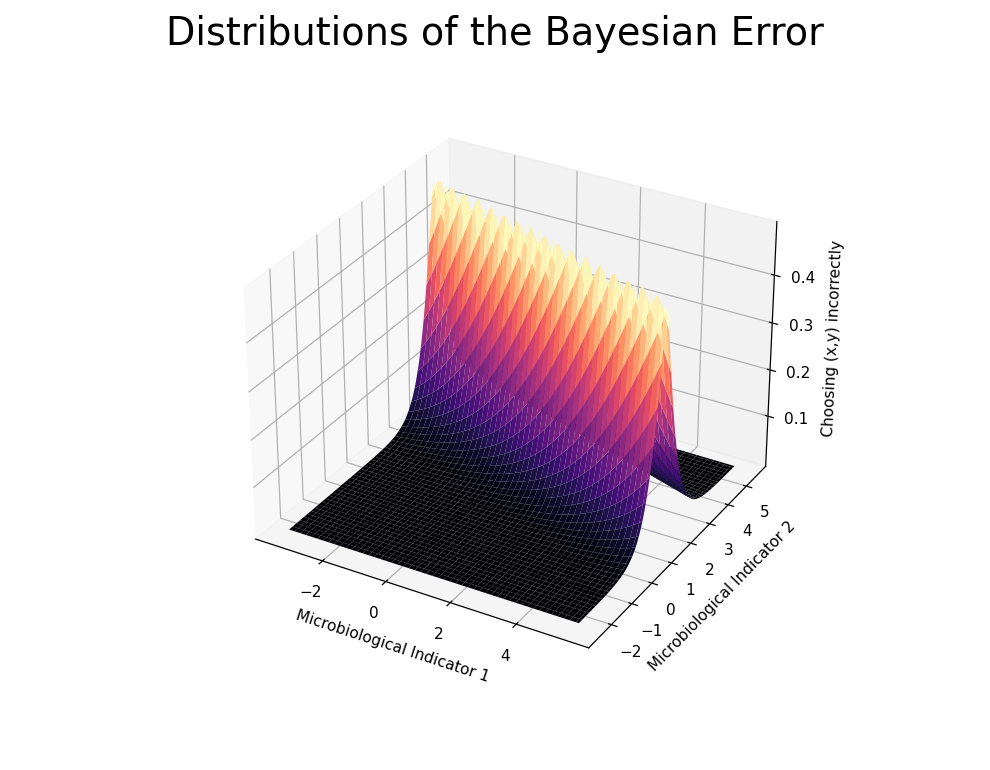

In [16]:
# Finding the probability of error
# The probability of error for each (x,y), i.e. the probability of judging the wrong result in the measurement (x,y),
# which is the minimum of the a-posteriori probabilities of P(w1|x) and P(w2|x)
MinError = np.minimum(Pw1CondX, Pw2CondX)

# The step dx is calculated by multiplying the difference between two back-to-back values of x and y accordingly
step  = (x[-1] - x[-2] )* (y[-1] - y[-2]) 

# The Bayesian Error is the integral (in this case the sum,because the values of x are discrete) of:
# the probability of error, p(x) and the step 
BayesianError = np.sum(MinError * PosX * step)

# Printing the probability of error
print("The probability of error is: " + str(BayesianError) + " which is ~" + str("{:.3f}".format(BayesianError*100))+"%")

# ------------------------------------------------------------------------#

# Plotting the distribution of the Bayesian Error
# The next line is ONLY for presentation purposes. Using both MinError and MaxError in the same graph we get the a-posteriori 
# probability graph, we presented in the previous inquiry
MaxError = np.maximum(Pw1CondX, Pw2CondX)
# 3D plot of the Bayesian Error
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.suptitle('Distributions of the Bayesian Error', fontsize=25)
fig.set_size_inches(9., 7.)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, MinError, cmap='magma', linewidth=0)

# The next line is ONLY for presentation purposes. Uncomment it to understand how the Bayesian Error is calculated.
# ax.plot_surface(X, Y, MaxError, cmap='winter', linewidth=0)

ax.set_xlabel('Μicrobiological Ιndicator 1')
ax.set_ylabel('Μicrobiological Ιndicator 2')
ax.set_zlabel('Choosing (x,y) incorrectly') 
plt.show()

#### Presentation of Task 4:

##### Bayes error
From theory the error is defined as $min(P($ω_1$|x), P($ω_2$|x)$).

In the above code we can see the __probability that we have made a mistake__, in classifying the patient in a different category than the one he belongs to (healthy or possible cancer). This probability is __about 3.5%.__ This probability was calculated after finding the __minimum of the a posteriori probabilities__, the __elementary step dx__ and the __total probability p(x).__

__Then a diagram is presented, in which we see:__
* on the __x,y__ axes, the two microbiological indicators
* on the __z__ axis, the probability of error or otherwise the doctor making a wrong decision while measuring (x,y)

__In the code for presentation purposes there is one line in comments:
```ax.plot_surface(X, Y, MaxError, cmap='winter', linewidth=0)```
which helps us to visualize and understand how the shape of the above graph came about. Removing the comment may help the reader.__
##### Conclusions derived from the above diagram:
From the __3D diagram__ we observe that:
* the __volume__ of the plot gives us the probability that we have made a mistake, or otherwise the __Bayesian error.__
* the error probability __progressively increases from 8% to 55%__ in the region where the two a-posterior distributions __approach each other, this is because __it is difficult to draw any conclusion,__ about which distribution the sample belongs to take. The probability of error becomes __maximum (~55%) at the intersection__ of the two a-posterior distributions with a somewhat sawtooth shape, as it is practically __difficult to choose which patient belongs__
* the error probability __progressively decreases__ as we move away from the intersection of the two Gaussians, reaching __0%,__ as it becomes easier to arrive at a correct result and classify the patient into the class it belongs to, since the classes __differ enough__ at those points



__For a doctor to make a wrong decision and judge that the patient has cancer when it does not (false positive), is not something that will cost the patient's life. Yes, he may need to do more tests or suffer psychologically, but in the end he will be diagnosed as healthy. In the event that the doctor judges that the patient does not have cancer when it does (false negative), this if the patient does not do a repeat examination can be fatal for the patient.__

__Possible Workarounds:__
* __One way to solve the issue could be to have the patient perform a second repeat test so that the error probability is close to 0%, but this does not sound very practical, as it is not done every time a patient to have a suspicion that he may be suffering from cancer to do repeated tests that will cost twice as much money and effort.__
* __A second way of solving could be larger decision bounds in the "probable cancer" class, but this would result in more people testing positive for cancer and thus a larger Bayesian error. So some people, as we mentioned above, would be in trouble, because they would be falsely positive, BUT more people could be diagnosed positively, while they really had cancer and thus the chance of saving their life would increase__
* __Using one more decision variable or having more data.__

## Part Β
### Task 1
#### Task 1 code:

<IPython.core.display.Javascript object>


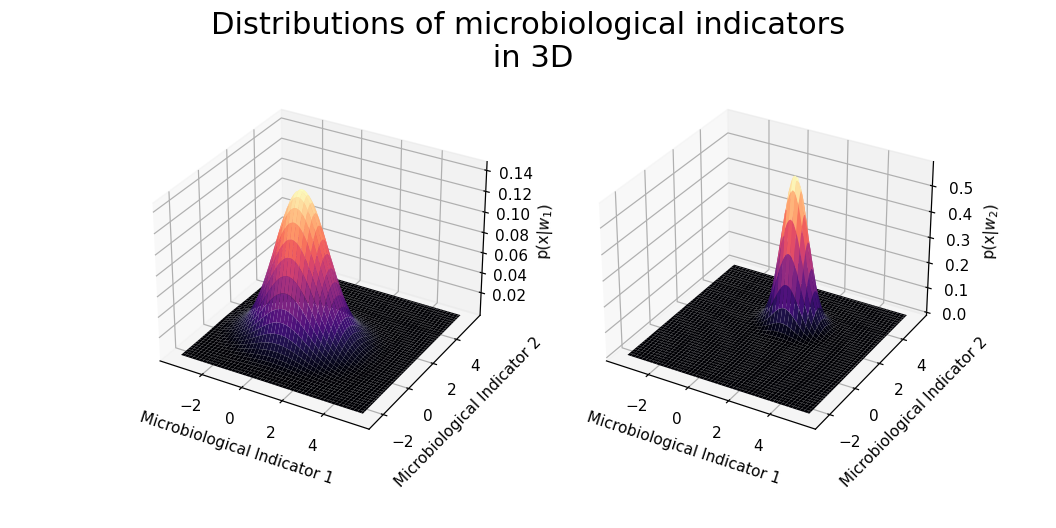

<IPython.core.display.Javascript object>


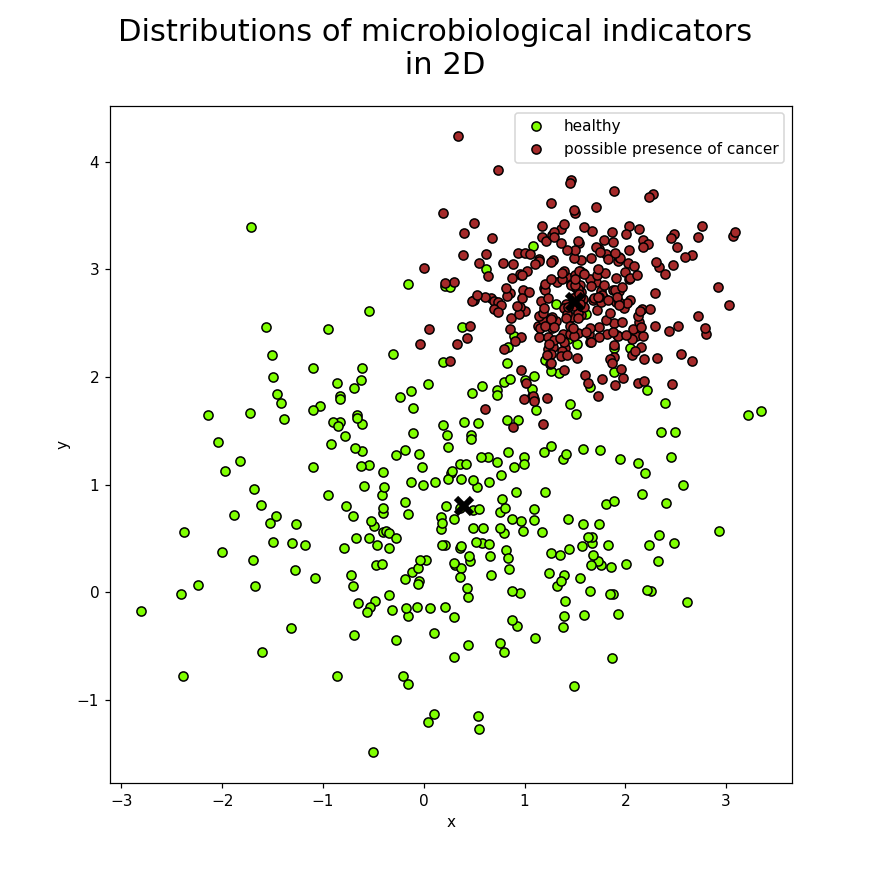

In [17]:
#Make a 3D plot
# Take 100 samples, with values from -3.5 to 5.5 and a step of 0.09, for the first microbiological indicator
x = np.linspace(-3.5,5.5,100) 
# Take 100 samples, with values from -2.5 to 5.5 and step 0.08, for the other microbiological indicator
y = np.linspace(-2.5,5.5,100) 

# Returns 2-D grid coordinates based on the coordinates contained in vectors x and y.
X, Y = np.meshgrid(x,y)

# Initiazes an 3D array with X,Y in the third dimension 
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y

# We calculate Gaussian probability density functions p(x|ω1) and p(x|ω2), based on the definition,
# with rv1--> p(x|ω1), rv2--> p(x|ω2)
rv1 = multivariate_normal(M1, CovMat) 
rv2 = multivariate_normal(M2, CovMat/4)

# Plot the 3D figure
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.suptitle('Distributions of microbiological indicators\n in 3D', fontsize=20)
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface
ax.plot_surface(X, Y, rv1.pdf(pos),cmap='magma',linewidth=0)
ax.set_xlabel('Μicrobiological Ιndicator 1')
ax.set_ylabel('Μicrobiological Ιndicator 2')
ax.set_zlabel('p(x|$w_1$)')
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D surface
ax.plot_surface(X, Y, rv2.pdf(pos),cmap='magma',linewidth=0)
ax.set_xlabel('Μicrobiological Ιndicator 1')
ax.set_ylabel('Μicrobiological Ιndicator 2')
ax.set_zlabel('p(x|$w_2$)')
plt.show()
# ------------------------------------------------------------------------#

#Make a 2D plot
# 300 random samples are taken from a normal multivariate distribution
# with mean-->M1,M2 and cov-->CovMat
samples1 = np.random.multivariate_normal(M1, CovMat, size=300)
samples2 = np.random.multivariate_normal(M2, CovMat/4, size=300)
#A second figure is created
fig2 = plt.figure(figsize=(8,8))
fig2.suptitle('Distributions of microbiological indicators \n in 2D', fontsize=20)
#Plotting the samples in one graph
plt.plot(samples1[:,0], samples1[:,1],'o',c = 'chartreuse',markeredgecolor = 'black')
plt.plot(samples2[:,0], samples2[:,1],'o',c= 'brown',markeredgecolor = 'black')
plt.xlabel('x');
plt.ylabel('y');
plt.plot(0.4,0.8,'x',c= 'black',markeredgecolor = 'black',markeredgewidth = 4,markersize=10)
plt.plot(1.5,2.7,'x',c= 'black',markeredgecolor = 'black',markeredgewidth = 4,markersize=10)
plt.legend(['healthy','possible presence of cancer']);

#### Presentation of Task 1:

##### In the diagrams above we see the distributions of the probability functions of the classes:
* ω1 (healthy)
* ω2 (probable existence of cancer)

__relative to x.__

##### Two diagrams were created:
* __"Distributions of microbiological indicators in 3D"__ which has:
     * on the __x,y__ axes, the __two microbiological indicators__
     * on the axis of __z__, the probability that a person is open to one of the 2 classes we said above.
    
     They are created with the help of the __multivariate_normal__ function, 2 "bells" and follow a multivariate normal distribution with means and covariance matrix mentioned above.



* __"Distributions of microbiological indicators in 2D"__:
     * in which __300__ samples were randomly selected from a multivariate normal distribution using the __np.random.multivariate_normal__ function.
     * has on its axes, the two microbiological indicators
     * The colors we see in the diagram are from incidents with microbiological indicators whose values correspond to:
         * with __green__ in healthy ones
         * with __red__ in people with possible cancer
         * with __black__ the centers of the two distributions
  


##### Conclusions derived from the above diagrams:
From the __3D diagram__ we observe that:
* the two distributions are centered at their mean values respectively
* __not__ are __uniformly distributed on the x,y__ axes, since even though the covariance matrix has __zeros on its non-main diagonal__ (we cannot draw any conclusion about the first index if we know the second and vice versa), __on the main diagonal__ the one element is almost __twice__ the other , which means that the __spread__ of the distribution around the __first indicator is almost twice the spread around the second indicator.__ The terminology of the above interpretation is __"diagonal multivariate Gaussian distribution"__


From the __2D diagram__ we observe that:
* considering an imaginary circle around the center of each distribution, we find that this graph is essentially the __top view__ of the above 3D graph.
* all samples are __randomly spaced__ around their __mean__ (represented by x on the graph), which __depends__ on the __covariance matrix__, i.e. the __spread__ it tells us they will have around each indicator, as mentioned above

__Regarding values of microbiological indicators:__

* __Negative values, as we said above, do not have any physical meaning, they are simply for presentation purposes.__

* __healthy__ individuals have a higher probability of having both values of the indicators, around the values taken by the __healthy__ distribution, i.e. towards the bottom left of the figure (positive), __with values close to (0.4, 0.8).__

* the __people who probably have cancer__, have a higher probability of having both values of the indices, around the values taken by the distribution __probable possible presence of cancer__, i.e. towards the upper right of the figure, __with values close to (1.5, 2.7 ).__

__It is relatively easy for a doctor to notice if a patient of his has the possibility of having cancer, since the values of the microbiological indicators, in case the patient is likely to have cancer, are for the first indicator about four times and for the second 3.5 times higher, compared to the values that the indicators would have, if the patient was healthy.__

__Compared to the first topic we notice the change in the values of the distributions of p(x|$ω_2$), as its covariance matrix has been divided by 4. This division has caused the distribution to be "compressed" and its values to be deflated 4 times less in terms of each microbiological indicator, as if we had reduced the decision limits significantly and the dispersion of the values had gone 4 times closer to the mean value of the distribution.__

### Task 2
#### Task 2 code:

<IPython.core.display.Javascript object>


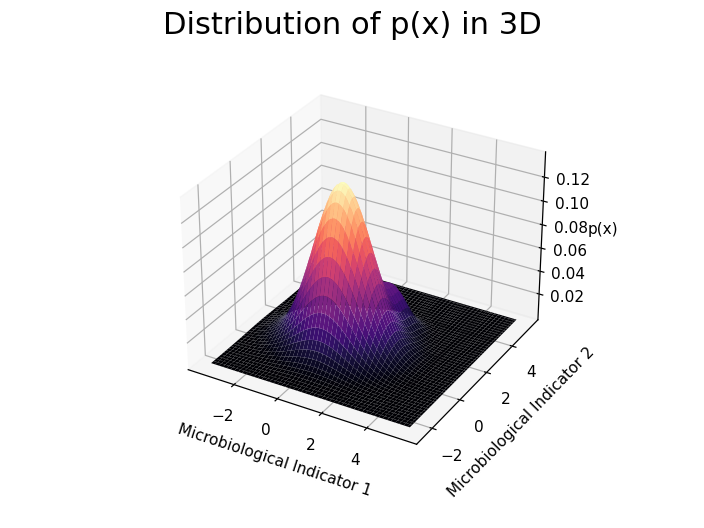

<IPython.core.display.Javascript object>


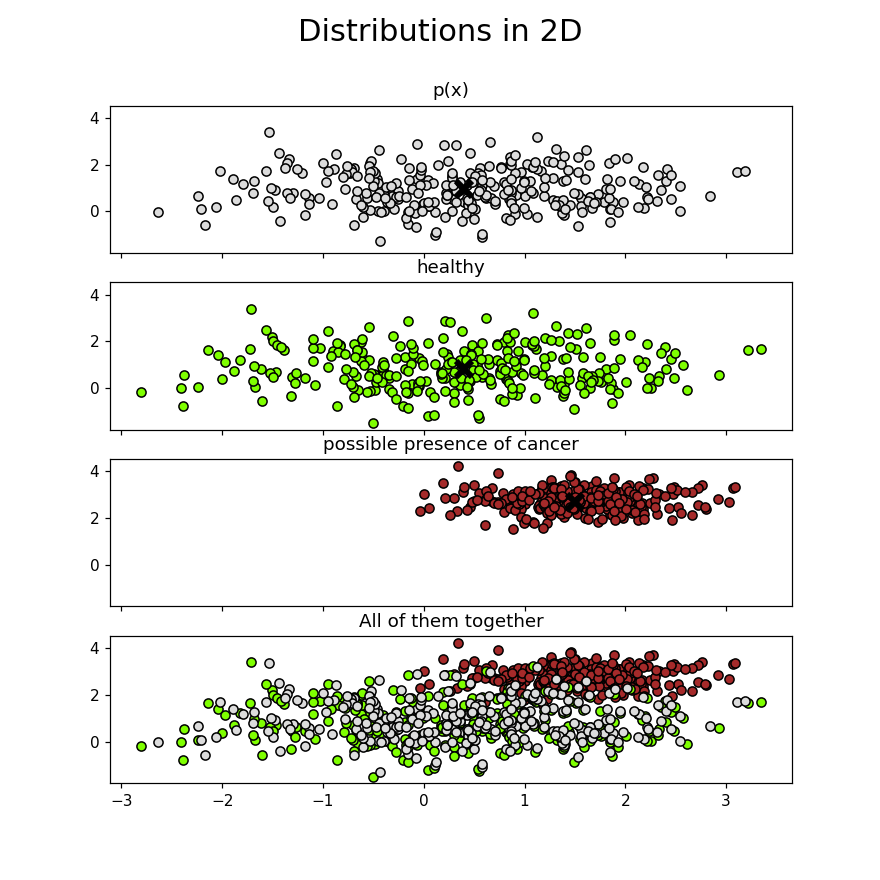

In [18]:
# The probability of (x,y) existsing,  PosX calculates the total probability distribution
# Calculated by the total probability theorem as sum((p(x|w_i)*P(w_i))), where i is the total number of the classes.
# In our code p(x|w_i) is represented by rvi.pdf(pos), P(w_i) by Pwi
PosX=(rv1.pdf(pos)*Pw1)+(rv2.pdf(pos)*Pw2)

# Plot the 3D figure
fig = plt.figure()
fig.suptitle('Distribution of p(x) in 3D', fontsize=20)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, PosX,cmap='magma',linewidth=0)
ax.set_xlabel('Μicrobiological Ιndicator 1')
ax.set_ylabel('Μicrobiological Ιndicator 2')
ax.set_zlabel('p(x)')
plt.show()

# ------------------------------------------------------------------------#

#Make a 2D 4x1 subplot
# The probability of (x,y) existsing,  PosX2 calculates the total probability distribution
# with the operation: (samples1*Pw1)+(samples2*Pw2), where samples1, samples2, 
# are the 300 random samples from the classes ω1 and ω2 respectively, that we presented in the previous query.
# Pw1 and Pw2, are the a priori probabilities, given by the utterance.
# This operation is derived from the total probability theorem as sum((p(x|w_i)*P(w_i))),
# where i is the total number of the classes. In our code p(x|w_i) is represented by samplesi, P(w_i) by Pwi.
PosX2 = (samples1*Pw1)+(samples2*Pw2) 

# Plotting p(x) 
fig3, axs = plt.subplots(4, sharex=True, sharey=True,figsize=(8,8))
fig3.suptitle('Distributions in 2D', fontsize=20)
axs[0].plot(PosX2[:,0], PosX2[:,1],'o',c = 'gainsboro',markeredgecolor = 'black')
axs[0].plot(statistics.mean(PosX2[:,0]),statistics.mean(PosX2[:,1]),'x',c= 'black',markeredgecolor = 'black',markeredgewidth = 4,markersize=10)
axs[0].set_title('p(x)');

axs[1].plot(samples1[:,0], samples1[:,1],'o',c = 'chartreuse',markeredgecolor = 'black')
axs[1].set_title('healthy');
axs[1].plot(0.4,0.8,'x',c= 'black',markeredgecolor = 'black',markeredgewidth = 4,markersize=10)

axs[2].plot(samples2[:,0], samples2[:,1],'o',c= 'brown',markeredgecolor = 'black')
axs[2].set_title('possible presence of cancer');
axs[2].plot(1.5,2.7,'x',c= 'black',markeredgecolor = 'black',markeredgewidth = 4,markersize=10)

axs[3].plot(samples2[:,0], samples2[:,1],'o',c= 'brown',markeredgecolor = 'black')
axs[3].plot(samples1[:,0], samples1[:,1],'o',c = 'chartreuse',markeredgecolor = 'black')
axs[3].plot(PosX2[:,0], PosX2[:,1],'o',c = 'gainsboro',markeredgecolor = 'black')
axs[3].set_title('All of them together');

#### Presentation of Task 2:

###### In the diagrams above, the total probability distribution is studied:
The total probability is given by the formula $p(x) = \sum_{i=1}^2 p(x|ω_i) P(ω_i)$. We have the values of the distributions __$p(x|ω_i)$__ from the __first question__ and the __a priori probability__ $P(ω_i)$ from the __utterance.__

__In the "Distribution of p(x) in 3D" diagram there are 3 axes:__
* the __x,y__, which have the __two microbiological indicators__
* the __z__, which presents the total probability distribution p(x).

  __In the 2D diagrams four cases are considered:__
* In the 1st diagram in __grey__ color, the distribution of the total probability p(x)

* In the 2nd diagram in __green__ color, the probability distribution of the samples whose microbiological indicators correspond to the healthy ones.

* In the 3rd chart in __red__ color, the probability distribution of samples whose microbiological markers correspond to the possible presence of cancer.

* In the 4th diagram all the previous diagrams are presented together so that we can observe them better

__The centers of each distribution are marked in black.__


__In every 2D diagram there are two axes corresponding to:__
* the __x,__ in the values of the first microbiological index
* the __y,__ in the values of the second microbiological index

from samples we took.



##### Conclusions derived from the above diagrams:

We examined the results given by both microbiological markers, i.e. the case of a person being __healthy__ or __having a possible presence of cancer__, based on both blood markers at the same time.
 
__Regarding the values of microbiological indicators:__
* We notice that p(x) is __quite similar__ to the class __"healthy" slightly shifted towards the class "likely to have cancer"__ , this is because as we see __from the formula__ the samples of each class are multiplied by a weight, a priori probability of each class and since __P($ω_1$) is 0.95__ and __P($ω_2$) 0.05__, the distribution __is quite similar__ more to the distribution of the __"healthy" class,__ i.e. it has __smaller values and in the 2 microbiological indicators.__

__Total probability is basically the overall results, ie 5% of people get cancer and 95% are healthy. Therefore, as we can see from the graph, we expect the general results to be quite similar to the distribution that healthy people have (because they are the larger percentage of people), i.e. the indices to be close to the values (0.4,0.8) and a small portion of people will have index values , which will be closer to (1.5,2.7).__

__Compared to the first subject we observe the change in the values of p(x), as from a uniform "bell", here it presents an additional "hill". This basically means that because the decision boundaries were limited to a 4 times smaller space than in the 1st Theme, there is a greater chance of detecting some values at these points, as even though the 5% of people who probably have cancer, in which their distribution changed , is not a large enough percentage, it is able to influence the distribution of the total probability to a degree, which can be seen in the difference of the two graphs.__

###  Task 3
#### Task 3 code:

<IPython.core.display.Javascript object>


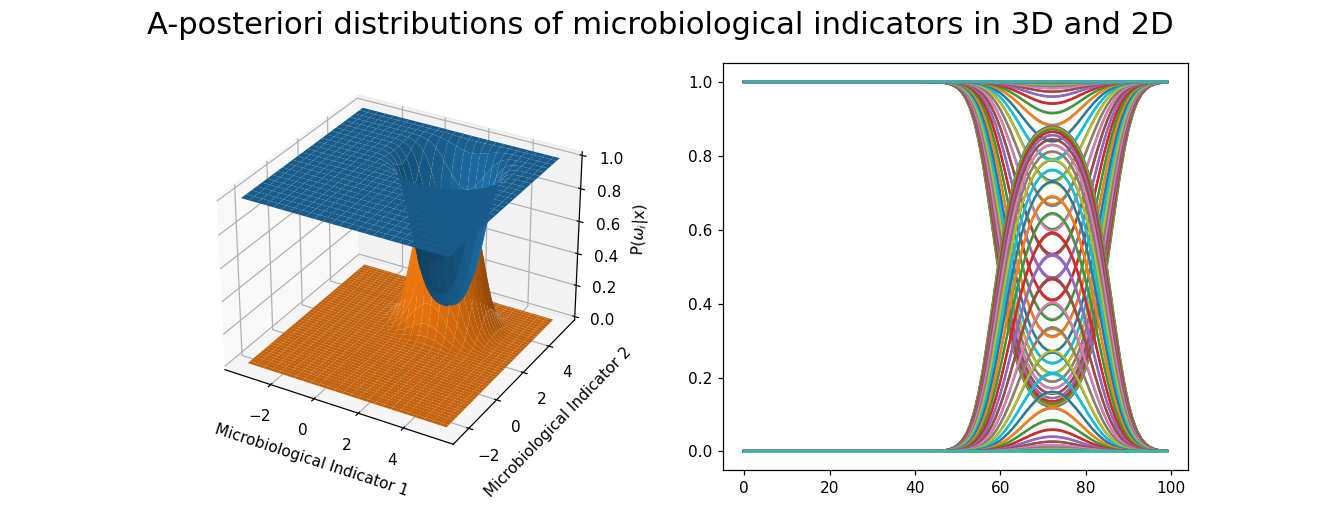

<IPython.core.display.Javascript object>


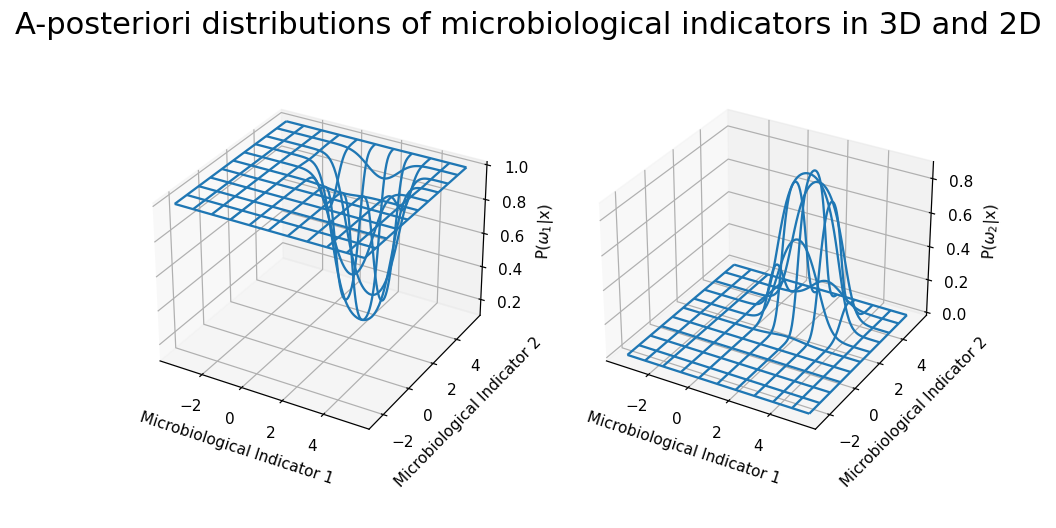

In [19]:
# A-posteriori probabilities P(ω1|x) and P(ω2|x) respectively. Calculated by the bayes theorem as (p(x|w_i)*P(w_i))/p(x). In our code
# p(x|w_i) is represented by rvi.pdf(pos), P(w_i) by Pwi and p(x) by PosX
Pw1CondX =(rv1.pdf(pos)*Pw1)/PosX 
Pw2CondX =(rv2.pdf(pos)*Pw2)/PosX 

# First Figure
#Make a 3D plot
fig = plt.figure(figsize=plt.figaspect(0.4))
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(X, Y, Pw1CondX, rstride=4, cstride=4, linewidth=0)
p = ax.plot_surface(X, Y, Pw2CondX, rstride=2, cstride=4, linewidth=0)
ax.set_xlabel('Μicrobiological Ιndicator 1')
ax.set_ylabel('Μicrobiological Ιndicator 2')
ax.set_zlabel('P($ω_i$|x)')

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2)
fig.suptitle('A-posteriori distributions of microbiological indicators in 3D and 2D', fontsize=20)
p = plt.plot(Pw1CondX)
p = plt.plot(Pw2CondX)

# ------------------------------------------------------------------------#

# Second Figure
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.suptitle('A-posteriori distributions of microbiological indicators in 3D and 2D', fontsize=20)
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface
ax.plot_wireframe(X, Y, Pw1CondX, rstride=10, cstride=10)
ax.set_xlabel('Μicrobiological Ιndicator 1')
ax.set_ylabel('Μicrobiological Ιndicator 2')
ax.set_zlabel('P($ω_1$|x)')
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe
ax.plot_wireframe(X, Y, Pw2CondX, rstride=10, cstride=10)
ax.set_xlabel('Μicrobiological Ιndicator 1')
ax.set_ylabel('Μicrobiological Ιndicator 2')
ax.set_zlabel('P($ω_2$|x)')
plt.show()

#### Presentation of Task 3:

##### At this point we will deal with the a-posteriori or posterior probabilities P ($ω_1$|x) and P ($ω_2$|x)
These are the probabilities that the state is $ω_1$ or $ω_2$ respectively, __given__ that the estimator __x__ has been counted, i.e. both indices have been counted.
Therefore, the requirement is given by the relation: $P(ω_i|x) = \frac{p(x|ω_i) P(ω_i)}{p(x)}$. We have the values of the distributions __$p(x|ω_i)$__ from the __first question,__ the __a priori probabilities__ $P(ω_i)$, from the __utterance__ and the __total probability__ p(x) from the __second question.__
__Probability density functions must also sum to unity.__

##### To study the possibilities we made 4 diagrams:
* The __first__ diagram, __third__ and __fourth__ are three-dimensional:
     * on the __x,y__ axes, correspond to the __two microbiological indicators__
     * on the __z__ axis, the __a posteriori__ probabilities

* _The __second__ chart is two dimensional:_
     * on the __x__ axis, the __two microbiological indicators__ correspond
     * on the __y__ axis, the __a posteriori__ probabilities



##### Conclusions derived from the above diagrams:
We studied the probability that an individual belongs to the __"healthy"__ class or to the __"probable cancer"__ class, given that both microbiological markers have been measured.

__In the diagrams we observe__, the probability that the person __who did the tests__ belongs to the group of __healthy people__ or to those __who have a possible presence of cancer__, depending on what __value__ each __microbiological index has taken.__

__In other words, we observe that:__

* __for the class of healthy individuals:__
     * for __values from 1.5 to 5.5__ in the __second microbiological index__ and __values from 0 to 4__ for the __first index,__ the __probability__ of the condition being __"healthy"__ __drops from 100% to 11%__
     * for __the remaining values__ of the indicators the __probability__ of the state being __"healthy"__ is __100%__
    
* __for the class of people with possible cancer:__
     * for __values from 1.5 to 5.5__ in the __second microbiological index__ and __values from 0 to 4__ for the __first index,__ the __probability__ of the condition being __"probable cancer"__ __from 0% to 89%__
     * for __the remaining values__ of the indicators the __probability__ of the condition being __"probable cancer"__ is __0%__

__Compared to the first issue we notice that:__
* __now both microbiological indicators play an important role in the selection of the respective condition, since the possible presence of cancer now corresponds to a certain range of indicator values and also each indicator affects exactly or at least with a very similar weight, the probability value__
* __while before we could not choose for some points which class they belong to, because the two a-posterior probabilities coincided, now because the distribution was "compressed" 4 times (so the points where someone probably has cancer are in a smaller space), a -posterior probability at the points where the probabilities no longer coincide until it is equal to 0% to probably have cancer and vice versa for the values of for the class of healthy individuals__

###  Task 4
#### Task 4 code:

The probability of error is: 0.029020557856745594 which is ~2.902%


<IPython.core.display.Javascript object>


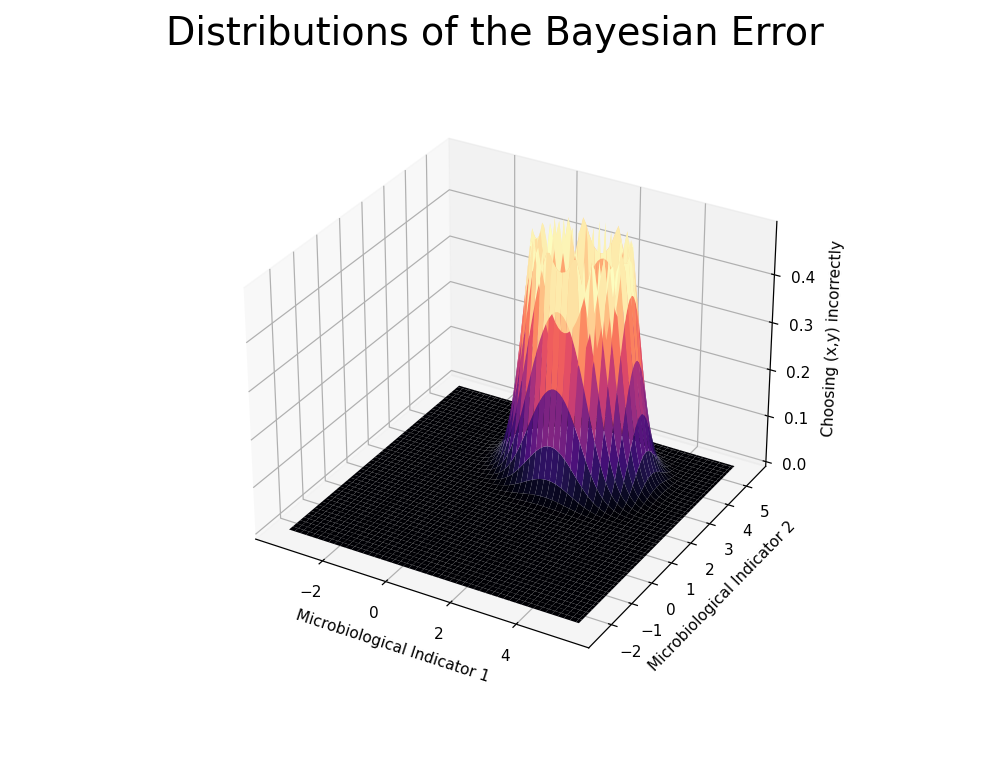

In [20]:
# Finding the probability of error
# The probability of error for each (x,y), i.e. the probability of judging the wrong result in the measurement (x,y),
# which is the minimum of the a-posteriori probabilities of P(w1|x) and P(w2|x)
MinError = np.minimum(Pw1CondX, Pw2CondX)

# The step dx is calculated by multiplying the difference between two back-to-back values of x and y accordingly
step  = (x[-1] - x[-2] )* (y[-1] - y[-2]) 

# The Bayesian Error is the integral (in this case the sum,because the values of x are discrete) of:
# the probability of error, p(x) and the step 
BayesianError = np.sum(MinError * PosX * step)

# Printing the probability of error
print("The probability of error is: " + str(BayesianError) + " which is ~" + str("{:.3f}".format(BayesianError*100))+"%")

# ------------------------------------------------------------------------#

# Plotting the distribution of the Bayesian Error
# The next line is ONLY for presentation purposes. Using both MinError and MaxError in the same graph we get the a-posteriori 
# probability graph, we presented in the previous inquiry
MaxError = np.maximum(Pw1CondX, Pw2CondX)
# 3D plot of the Bayesian Error
fig = plt.figure(figsize=plt.figaspect(0.5))
fig.suptitle('Distributions of the Bayesian Error', fontsize=25)
fig.set_size_inches(9., 7.)
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, MinError, cmap='magma', linewidth=0)

# The next line is ONLY for presentation purposes. Uncomment it to understand how the Bayesian Error is calculated.
# ax.plot_surface(X, Y, MaxError, cmap='winter', linewidth=0)

ax.set_xlabel('Μicrobiological Ιndicator 1')
ax.set_ylabel('Μicrobiological Ιndicator 2')
ax.set_zlabel('Choosing (x,y) incorrectly') 
plt.show()

#### Presentation of Task 4:

##### Bayes error
From theory the error is defined as $min(P($ω_1$|x), P($ω_2$|x)$).

In the code above we can see the __probability that we have made a mistake,__ in classifying the patient in a different category than the one he belongs to (healthy or possible cancer). This probability is __about 2.9%.__ This probability was calculated after finding the __minimum of the a posteriori probabilities__, the __elementary step dx__ and the __total probability p(x).__

__Then a diagram is presented, in which we see:__
* on the __x,y__ axes, the two microbiological indicators
* on the __z__ axis, the probability of error or otherwise the doctor making a wrong decision while measuring (x,y)

__In the code for presentation purposes there is one line in comments:
```ax.plot_surface(X, Y, MaxError, cmap='winter', linewidth=0)```
which helps us to visualize and understand how the shape of the above graph came about. Removing the comment may help the reader.__
##### Conclusions derived from the above diagram:
From the __3D diagram__ we observe that:
* the __volume__ of the plot gives us the probability that we have made a mistake, or otherwise the __Bayesian error.__
* the probability of error is __from 0% to ~45%__ for __values from 1.5 to 5.5__ in the __second microbiological index__ and __values from 0 to 4__ for the __first index, as there is quite a large overlap of the two Gaussians at those points and has as result in making the decision of the class difficult
* the probability of error is __~0% in any other range of values of the two microbiological markers,__ as there is no overlap of the two a-posteriori probabilities


__For a doctor to make a wrong decision and judge that the patient has cancer when it does not (false positive), is not something that will cost the patient's life. Yes, he may need to do more tests or suffer psychologically, but in the end he will be diagnosed as healthy. In the event that the doctor judges that the patient does not have cancer when it does (false negative), this if the patient does not do a repeat examination can be fatal for the patient.__

__Possible Workarounds:__
* __One way to solve the issue could be to have the patient perform a second repeat test so that the error probability is close to 0%, but this does not sound very practical, as it is not done every time a patient to have a suspicion that he may be suffering from cancer to do repeated tests that will cost twice as much money and effort.__
* __A second way of solving could be larger decision bounds in the "probable cancer" class, but this would result in more people testing positive for cancer and thus a larger Bayesian error. So some people, as we mentioned above, would be in trouble, because they would be falsely positive, BUT more people could be diagnosed positively, while they really had cancer and thus the chance of saving their life would increase__
* __Using one more decision variable or having more data.__

### The Bayesian error in this case and how the difference with the corresponding error in part A is explained

__The Bayesian error, as expected, was reduced relative to that of part A, since the decision boundaries of the $ω_2$ class were essentially compressed. This resulted in someone who was likely to have cancer having to have a certain range in their microbiological indicators, unlike before when with different values in the microbiological indicators there was a small but calculable error. So it became easier in the event that someone really has the possibility of suffering, to be diagnosed as well.__

__Nevertheless, yes the Bayes error is smaller in this case, but the risk of a patient being misdiagnosed by the doctor is higher, as the decision area of the $ω_2$ class has shrunk by 4 times. This means that the error probability from a wavy shape in the A part, acquired a cone-like shape. This results in:__

* __some people who have microbes that belong outside the cone and inside the wave would be diagnosed as healthy in part B, while in part A they would have a fair chance of being diagnosed with cancer__

* __some people who have microbes that belong inside the cone and outside the wave will be diagnosed similarly__

### General Conclusion
__So we observe that the people who belong to the first dot will be diagnosed with a higher probability of error that they do not have cancer, when they do, which means that although the error will be reduced by 0.5%, there will be some people who in the previous way of part A , they could probably have been diagnosed correctly.__